In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize
pd.set_option('max_colwidth', None)

In [2]:
labeled_data = pd.read_csv('generated_snippets.csv').drop(columns=['Unnamed: 0'])
labeled_data.guidance = labeled_data.guidance.astype(int)
labeled_data = labeled_data.dropna().reset_index()
labeled_data['snippets']=labeled_data['snippets'].str.replace('\\n\\n','',regex=True)
labeled_data.head()
dataset = labeled_data

vectorizer = TfidfVectorizer (max_features = 750)



my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

vectorizer = TfidfVectorizer(max_features=750, ngram_range=(1,1), stop_words=list(my_stop_words))
tokenized_data = vectorizer.fit_transform(dataset['snippets']).toarray()

labels = np.array(dataset["guidance"])  # Label is already an array of 0 and 1

rf = RandomForestClassifier(n_estimators=100)
X = tokenized_data
y = labels
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
rf.fit(X_train,y_train)



RandomForestClassifier()

In [3]:
labeled_data

,index,snippets,guidance
0,0,We anticipate net charge-offs to remain within a range of 3.9% to 4.3% for next year.,1
1,1,"We continue to monitor macroeconomic trends and the outlook for our customers and our industry, and we may make further adjustments to our outlook if developments indicate a need for us to change course. We are well positioned to deliver strong results for our shareholders regardless of what comes next.",1
2,2,"We understand the responsibility we have to manage our credit risks carefully and responsibly, and we are committed to proactive measures to protect our customer base and our bottom line.",1
3,5,"Given these dynamics, we anticipate that net charge-offs could increase to between 4.0% and 4.4% over the course of 2023. This range is in line with our expectations for the macroeconomic environment, while preserving the balance between responsible lending and keeping the cost of funds competitive.",1
4,6,"Longer-term, we expect charge-off rates to normalize within a range between 2.5% and 3.5%. Depending on absolute levels of charge-offs, our business strategy could be impacted if we are unable to absorb higher-than-anticipated levels. We consider this risk as part of our overall risk management process and will actively monitor charge-off levels to ensure that our business continues to perform in an effective manner.",1
...,...,...,...
817,995,"Additionally, we grew deposits by 22%, driven largely by our robust mobile capabilities and digital offerings that appeal to new customers. Finally, beyond our strong financial performance, we also saw customer satisfaction with our services increase by 7%, a testament to the investments we’ve made in customer experience.",0
818,996,"Second, operating income grew by 17%, driven by strong volume growth, increased productivity and improved expense management. This is reflective of our ongoing commitment to drive long-term value and generate consistent results.Finally, our customer satisfaction ratings remain high, indicating that existing customers are satisfied with our service.Overall, these results make it clear that our efforts are translating into meaningful value for our shareholders and that we are well-positioned to continue delivering strong returns.",0
819,997,"Second, we grew new deposits by 24% and saw a 14% improvement in deposit mix shifting more towards higher-margin products. Third, we grew net revenue year-over-year by 12%. This was driven by strong growth in both net interest income and non-interest income.Overall, these strong results exceed our expectations, demonstrate the effectiveness of our strategy, and set us up to continue leading the industry in digital banking. We are more confident than ever about our ability to drive future growth and deliver future value to our customers, employees, and shareholders.",0
820,998,"Second, our deposit accounts increased by 15%, showcasing our ability to leverage our digital platform and attract both existing and new customers. Third, we increased our market share in the mortgage segment by an impressive 28%. This indicates our growing ability to execute in this highly competitive space and is driven by our continued investment in our mortgage platform, operations and customer experience.",0


In [4]:
predictions = rf.predict(X_test)

In [5]:
round(accuracy_score(y_test, predictions),4)

0.9879

In [6]:
round(f1_score(y_test,predictions),4)

0.9848

In [7]:

filex = open('capital_one.txt', 'r')
text = filex.read()
tokens = nltk.sent_tokenize(text)
target_data = {"snippets":tokens}
target_data = pd.DataFrame(target_data)
target_data.snippets = target_data.snippets.str.replace('billion|or','',regex=True)
target_data.head()

,snippets
0,"In the fourth quarter, Capital One earned $1.2 $3.03 per diluted common share."
1,"F the full year, Capital One earned $7.4 $17.91 per share."
2,"Included in the results f the fourth quarter were two adjusting items, which collectively benefited pre-tax earnings by $105 million."
3,"Net of these adjustments, fourth quarter earnings per share were $2.82 and full year earnings per share $17.71."
4,"On a linked quarter basis, period-end loans grew 3% and average loans grew 2%, driven by growth in our domestic card business."


In [8]:
dataset = target_data
#vectorizer = TfidfVectorizer (max_features=750)

vectorizer = TfidfVectorizer(max_features=750, ngram_range=(1,1), stop_words=list(my_stop_words))
#tokenized_data = vectorizer.fit_transform(dataset['snippets']).toarray()



vectorizer.fit(dataset['snippets'])
new_data_processed = vectorizer.transform(target_data['snippets']).toarray()
y_pred = rf.predict(new_data_processed)

In [9]:
target_data['class_prediction'] = y_pred
target_data.tail()


,snippets,class_prediction
339,No.,1
340,"And I think Rich touched on some of these in one of his earlier responses, but what we're seeing in terms of nmalization is playing out as we expect.",1
341,It's part of why I wanted to highlight the fact that the mechanics of the reserve though only take into account that 12-month model period and revert from there.,1
342,"And so, we're only allowing f the content, the outstanding content at the end of the quarter as well.",1
343,"So even if things play out exactly as we expect, we could see allowance build, just like we saw this quarter, it just depends on a whole host of facts.",1


Text(0.5, 0, 'snippets')

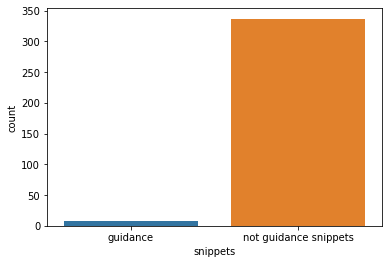

In [10]:
import seaborn as sns
sns.countplot(x=pd.DataFrame(y_pred)[0])
plt.xticks([0,1],['guidance','not guidance snippets'])
plt.xlabel('snippets')

In [11]:
dataset = labeled_data
from sklearn.linear_model import LogisticRegression

labels = np.array(dataset["guidance"])  # Label is already an array of 0 and 1

X = tokenized_data
y = labels
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
rf = LogisticRegression(random_state=0).fit(X_train, y_train)



In [12]:
round(f1_score(y_test,predictions),4)

0.3692

In [13]:
dataset = target_data

y_pred = rf.predict_proba(new_data_processed)
target_data['probability'] = pd.DataFrame(y_pred)[[0]]
target_data.sort_values('probability',ascending=False)

,snippets,class_prediction,probability
203,But payment rates continue to be strong.,0,0.801636
297,"And f what it's wth, those assumptions also then carry into that reversion period.",1,0.764122
216,"So Capital One has -- we continue to suppt the various technology players, who have developed payment innovations, and we continue to develop innovations of our own.",1,0.758827
121,So consumer credit metrics remain strong.,0,0.752574
343,"So even if things play out exactly as we expect, we could see allowance build, just like we saw this quarter, it just depends on a whole host of facts.",1,0.682336
...,...,...,...
114,"But as our growth continues, a ption of our allowance builds going fward are intended to suppt that growth.",1,0.251254
120,"Thanks, Ryan.",1,0.245107
165,"Of course, most of the marketing that we do is in the card business.",1,0.238550
187,"And we have, of course, a very vigilant eye on the economic environment that we're moving into.",1,0.220447
